## Descriptive Analysis 

### Notebook Overview
#### This descriptive analysis examines the *merged World Happiness dataset from 2015–2024 with 1,310 rows of data across 131 countries. The analysis focuses on understanding patterns, distributions, and relationships in global happiness and health metrics.
---

## Analysis Framework: Four Key Descriptive Charts

### 1. Health vs Happiness Relationship Analysis
- **Type of Analysis**: Correlation Analysis (Bivariate-Statistical technique that examines the relationship between two continuous variables.)  
- **Chart Type**: Scatter plot with trend line and continent color-coding  
- **Purpose**: Explores the direct relationship between healthy life expectancy and happiness scores across countries  
---

### 2. Happiness Score Trends Over Time (2015–2024)
- **Type of Analysis**: Time Series Analysis (Temporal Trend)  
- **Chart Type**:area chart  
- **Purpose**: Reveals temporal patterns and global happiness trajectory over the decade  
---

### 3. Key Happiness Factors Correlation Matrix
- **Type of Analysis**: Correlation Matrix Analysis (Multivariate-Comprehensive analysis examining relationships between multiple variables simultaneously using Plotly)  
- **Chart Type**: Correlation heatmap  
- **Purpose**: Identifies which factors most strongly influence happiness and their inter-relationships  
---

### 4. Continental happiness factors & Happiness Comparison
- **Type of Analysis**: Comparative Analysis (Cross-sectional)  
- **Chart Type**: Grouped bar chart   
- **Purpose**: Compares happiness factors and happiness metrics across continents 
---


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats  # For correlation Analysis

In [2]:
df =pd.read_csv('../data/cleaned/cleaned_df_all_2015_to_2024.csv')

In [ ]:
# Initial data exploration
df.info()
df.describe()
df.isnull().sum()
df.head()


#### Fixing Congo Variants (Row Mismatch 1318 → 1310)

- **Expected rows:** 1,310 ( 31 countries × 10 years, 2015‑2024 )  
- **Actual rows:** 1,318  
- **Cause:** *Congo* appears **18 times** instead of the expected 10.  
  - Two spellings exist:
    1. **Congo (Brazzaville)**  → mapped to `Congo`
    2. **Congo (Kinshasa)**  → mapped to `Congo`
- One of these variants is **missing in ≥ 2 years**, so its extra rows must be removed (8 rows) to restore the 1,310‑row target.

---

#### Plan

1. **Locate both original variants** before mapping.  
2. **Count each variant** by year (2015‑2024).  
3. **Identify the variant that does *not* appear in all 10 years.**  
4. **Drop all rows** of that incomplete variant (≈ 8 rows).  
5. **Verify final row count** = 1,310.

In [39]:
# Total number of unique countries
unique_countries_count = df['Country'].nunique()
print(f"Total unique countries: {unique_countries_count}")

# Number of times each country appears
country_counts = df['Country'].value_counts()

print(country_counts.to_string())



Total unique countries: 131
Country
Congo                      18
Afghanistan                10
Netherlands                10
Poland                     10
Philippines                10
Peru                       10
Paraguay                   10
Panama                     10
Palestinian Territories    10
Pakistan                   10
Norway                     10
North Macedonia            10
Nigeria                    10
Niger                      10
Nicaragua                  10
New Zealand                10
Nepal                      10
Romania                    10
Myanmar                    10
Morocco                    10
Montenegro                 10
Mongolia                   10
Moldova                    10
Mexico                     10
Mauritius                  10
Mauritania                 10
Malta                      10
Mali                       10
Malaysia                   10
Malawi                     10
Madagascar                 10
Luxembourg                 10
Port

In [40]:
# Find duplicate rows based on Country and Year for Congo
duplicate_rows = df[df['Country'] == 'Congo'].duplicated(subset=['Country', 'Year'], keep=False)

# Show duplicated rows only
print(df[(df['Country'] == 'Congo') & (duplicate_rows)])


    Country  Happiness Rank  Happiness Score   Economy    Family  \
240   Congo             120            4.517  0.000000  1.001200   
241   Congo             139            3.989  0.678660  0.662900   
242   Congo             125            4.272  0.056610  0.806760   
243   Congo             127            4.236  0.771090  0.477990   
244   Congo             124            4.291  0.808964  0.832044   
245   Congo             126            4.280  0.092102  1.229023   
246   Congo             114            4.559  0.682000  0.811000   
247   Congo             132            4.245  0.069000  1.136000   
248   Congo             103            4.812  0.673000  0.799000   
249   Congo             127            4.418  0.094000  1.125000   
250   Congo              88            5.190  0.630000  0.760000   
251   Congo             131            4.310  0.060000  0.830000   
254   Congo              86            5.267  0.921000  0.665000   
255   Congo             133            3.207  0.

In [41]:
# Load each CSV file into a separate DataFrame
df_2015 = pd.read_csv('../data/raw/2015.csv')  # Load the 2015 World Happiness data
df_2016 = pd.read_csv('../data/raw/2016.csv')  # Load the 2016 World Happiness data
df_2017 = pd.read_csv('../data/raw/2017.csv')  # Load the 2017 World Happiness data
df_2018 = pd.read_csv('../data/raw/2018.csv')  # Load the 2018 World Happiness data
df_2019 = pd.read_csv('../data/raw/2019.csv')  # Load the 2019 World Happiness data
df_2020 = pd.read_csv('../data/raw/2020.csv')  # Load the 2020 World Happiness data
df_2021 = pd.read_csv('../data/raw/2021.csv')  # Load the 2021 World Happiness data
df_2022 = pd.read_csv('../data/raw/2022.csv')  # Load the 2022 World Happiness data
df_2023 = pd.read_csv('../data/raw/2023.csv')  # Load the 2023 World Happiness data
df_2024 = pd.read_csv('../data/raw/2024.csv')  # Load the 2024 World Happiness data

In [42]:
# Congo variants in each dataset from 2015 to 2024

congo_2015 = df_2015[df_2015['Country'].str.contains('Congo', case=False, na=False)]
print("Congo variants in 2015 dataset:")
print(congo_2015[['Country','Happiness Rank']])

congo_2016 = df_2016[df_2016['Country'].str.contains('Congo', case=False, na=False)]
print("\nCongo variants in 2016 dataset:")
print(congo_2016[['Country','Happiness Rank']])

congo_2017 = df_2017[df_2017['Country'].str.contains('Congo', case=False, na=False)]
print("\nCongo variants in 2017 dataset:")
print(congo_2017[['Country','Happiness.Rank']])

congo_2018 = df_2018[df_2018['Country or region'].str.contains('Congo', case=False, na=False)]
print("\nCongo variants in 2018 dataset:")
print(congo_2018[['Country or region','Overall rank']])

congo_2019 = df_2019[df_2019['Country or region'].str.contains('Congo', case=False, na=False)]
print("\nCongo variants in 2019 dataset:")
print(congo_2019[['Country or region','Overall rank']])

congo_2020 = df_2020[df_2020['Country name'].str.contains('Congo', case=False, na=False)]
print("\nCongo variants in 2020 dataset:")
print(congo_2020[['Country name','Happiness Rank']])

congo_2021 = df_2021[df_2021['Country name'].str.contains('Congo', case=False, na=False)]
print("\nCongo variants in 2021 dataset:")
print(congo_2021[['Country name','Happiness Rank']])

congo_2022 = df_2022[df_2022['Country name'].str.contains('Congo', case=False, na=False)]
print("\nCongo variants in 2022 dataset:")
print(congo_2022[['Country name','Happiness Rank']])

congo_2023 = df_2023[df_2023['Country name'].str.contains('Congo', case=False, na=False)]
print("\nCongo variants in 2023 dataset:")
print(congo_2023[['Country name','Happiness Rank']])

congo_2024 = df_2024[df_2024['Country name'].str.contains('Congo', case=False, na=False)]
print("\nCongo variants in 2024 dataset:")
print(congo_2024[['Country name','Happiness Rank']])


Congo variants in 2015 dataset:
                 Country  Happiness Rank
119     Congo (Kinshasa)             120
138  Congo (Brazzaville)             139

Congo variants in 2016 dataset:
                 Country  Happiness Rank
124     Congo (Kinshasa)             125
126  Congo (Brazzaville)             127

Congo variants in 2017 dataset:
                 Country  Happiness.Rank
123  Congo (Brazzaville)             124
125     Congo (Kinshasa)             126

Congo variants in 2018 dataset:
       Country or region  Overall rank
113  Congo (Brazzaville)           114
131     Congo (Kinshasa)           132

Congo variants in 2019 dataset:
       Country or region  Overall rank
102  Congo (Brazzaville)           103
126     Congo (Kinshasa)           127

Congo variants in 2020 dataset:
            Country name  Happiness Rank
87   Congo (Brazzaville)              88
130     Congo (Kinshasa)             131

Congo variants in 2021 dataset:
           Country name  Happiness Rank
82  

**Action:**  
To resolve this, I compared the **Happiness Rank** values of both variants across the years. Since **Congo (Kinshasa)** had incomplete data in all datasets, I dropped all rows corresponding to **Congo (Kinshasa)** from the merged dataset. This ensured the dataset contains only the complete and consistent **Congo (Brazzaville)** data mapped to **`Congo`**.

In [47]:


#  Define the (Year, Happiness Rank) pairs to remove
rows_to_drop = [
    (2015, 120),
    (2016, 125),
    (2017, 126),
    (2018, 132),
    (2019, 127),
    (2020, 131),
    (2023, 133),
    (2024, 139),
]

# Build a boolean mask that is True only for those rows
mask = (
    (df['Country'] == 'Congo') &
    df.set_index(['Year', 'Happiness Rank']).index.isin(rows_to_drop)
)

#  Drop the rows
df = df[~mask]

#  Verify the result
print("Expected rows:", 131 * 10)        # 1 310
print("Actual rows after drop:", len(df))


Expected rows: 1310
Actual rows after drop: 1310


In [48]:
# Total number of unique countries
unique_countries_count = df['Country'].nunique()
print(f"Total unique countries: {unique_countries_count}")

# Number of times each country appears
country_counts = df['Country'].value_counts()

print(country_counts.to_string())


Total unique countries: 131
Country
Afghanistan                10
Romania                    10
Poland                     10
Philippines                10
Peru                       10
Paraguay                   10
Panama                     10
Palestinian Territories    10
Pakistan                   10
Norway                     10
North Macedonia            10
Nigeria                    10
Niger                      10
Nicaragua                  10
New Zealand                10
Netherlands                10
Nepal                      10
Myanmar                    10
Morocco                    10
Montenegro                 10
Mongolia                   10
Moldova                    10
Mexico                     10
Mauritius                  10
Mauritania                 10
Malta                      10
Mali                       10
Malaysia                   10
Malawi                     10
Madagascar                 10
Luxembourg                 10
Portugal                   10
Russ

In [49]:
congo_rows = df[df['Country'] == 'Congo']
print("Total 'Congo' rows:", len(congo_rows))
display(congo_rows)


Total 'Congo' rows: 10


,Country,Happiness Rank,Happiness Score,Economy,Family,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Continent,Year
241,Congo,139,3.989,0.678660,0.662900,0.310510,0.414660,0.116860,0.123880,Africa,2015
243,Congo,127,4.236,0.771090,0.477990,0.282120,0.379380,0.097530,0.120770,Africa,2016
244,Congo,124,4.291,0.808964,0.832044,0.289957,0.435026,0.079618,0.120852,Africa,2017
246,Congo,114,4.559,0.682000,0.811000,0.343000,0.514000,0.077000,0.091000,Africa,2018
248,Congo,103,4.812,0.673000,0.799000,0.508000,0.372000,0.093000,0.105000,Africa,2019
250,Congo,88,5.190,0.630000,0.760000,0.460000,0.390000,0.120000,0.120000,Africa,2020
252,Congo,83,5.342,0.518000,0.392000,0.307000,0.381000,0.124000,0.144000,Africa,2021
253,Congo,99,5.075,0.950000,0.405000,0.355000,0.431000,0.146000,0.130000,Africa,2022
254,Congo,86,5.267,0.921000,0.665000,0.145000,0.464000,0.136000,0.134000,Africa,2023
256,Congo,89,5.221,0.892000,0.622000,0.306000,0.523000,0.138000,0.124000,Africa,2024


Unwanted Congo (Kinshasa) rows successfully dropped.

Final dataset row count: 1,310 rows (as expected — 31 countries × 10 years).

Ensured only one valid Congo entry per year remains for analysis.

In [ ]:

#To Overwrite the Existing cleaned_df_all_2015_to_2024.csv
df.to_csv('cleaned_df_all_2015_to_2024.csv', index=False)


#### Rounding Float Values to 5 Decimal Places
  To improve readability and reduce unnecessary precision, the float-type columns in the dataset have been rounded to 5 decimal places. This helps in minimizing long decimal values without significant loss of information.

In [4]:
df =pd.read_csv('../data/cleaned/cleaned_df_all_2015_to_2024.csv')

During data exploration, it was observed that the 2017 data contains float values with more than 5 decimal places, whereas the data from other years has cleaner, shorter decimal values.

To maintain consistency across all years and improve readability, the selected float columns were rounded to 5 decimal places using the pandas .round() method.

In [6]:

# Columns to round
float_cols = [
    'Happiness Score', 'Economy', 'Family',
    'Healthy life expectancy', 'Freedom to make life choices',
    'Perceptions of corruption', 'Generosity'
]

# Round those columns to 5 decimal places
df[float_cols] = df[float_cols].round(5)


In [ ]:
# to verify first 5 rows where Year is 2017
df[df['Year'] == 2017].head()


,Country,Happiness Rank,Happiness Score,Economy,Family,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Continent,Year
2,Afghanistan,141,3.794,0.40148,0.58154,0.18075,0.10618,0.06116,0.31187,Asia,2017
12,Albania,109,4.644,0.99619,0.80369,0.73116,0.38150,0.03986,0.20131,Europe,2017
22,Algeria,53,5.872,1.09186,1.14622,0.61758,0.23334,0.14610,0.06944,Africa,2017
32,Argentina,24,6.599,1.18530,1.44045,0.69514,0.49452,0.05974,0.10946,South America,2017
42,Armenia,121,4.376,0.90060,1.00748,0.63752,0.19830,0.02667,0.08349,Asia,2017


Recalculating Happiness Rank After Data Cleaning
Some countries were removed during data cleaning, which made the original Happiness Rank inaccurate.
To address this, a new column called Happiness Rank (Cleaned Data) was created by re-ranking countries based on their Happiness Score within each year.

This ensures that the rankings reflect only the countries currently in the dataset, providing more accurate and meaningful analysis.

In [8]:
# Recalculate rank by year based on Happiness Score
df['Happiness Rank (Cleaned Data)'] = df.groupby('Year')['Happiness Score'].rank(ascending=False).astype(int)


In [9]:
df.head()


,Country,Happiness Rank,Happiness Score,Economy,Family,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Continent,Year,Happiness Rank (Cleaned Data)
0,Afghanistan,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,Asia,2015,129
1,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,Asia,2016,130
2,Afghanistan,141,3.794,0.40148,0.58154,0.18075,0.10618,0.06116,0.31187,Asia,2017,124
3,Afghanistan,145,3.632,0.33200,0.53700,0.25500,0.08500,0.03600,0.19100,Asia,2018,127
4,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,Asia,2019,131


In [10]:
top_5_per_year = df[df['Happiness Rank (Cleaned Data)'] <= 5].sort_values(['Year', 'Happiness Rank (Cleaned Data)'])

# Display the top 5 countries per year
top_5_per_year[['Year', 'Country', 'Happiness Score', 'Happiness Rank (Cleaned Data)']]


,Year,Country,Happiness Score,Happiness Rank (Cleaned Data)
1120,2015,Switzerland,7.587,1
480,2015,Iceland,7.561,2
290,2015,Denmark,7.527,3
890,2015,Norway,7.522,4
190,2015,Canada,7.427,5
291,2016,Denmark,7.526,1
1121,2016,Switzerland,7.509,2
481,2016,Iceland,7.501,3
891,2016,Norway,7.498,4
361,2016,Finland,7.413,5


Outlier Detection and Treatment:

During data preprocessing, several numerical columns were checked for outliers using the Interquartile Range (IQR) method. This method helps detect extreme values that may skew the analysis.

IQR = Q3 − Q1, and any value outside [Q1 − 1.5×IQR, Q3 + 1.5×IQR] is considered an outlier.

To handle these outliers, we applied the Winsorization method, which limits extreme values to reduce their influence without removing any rows. Specifically, we capped the bottom and top 5% of values in each feature column.

Columns Processed:Happiness Score,Economy,Family,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption and Generosity.

This approach ensures the data remains robust and stable for further statistical analysis and modeling.

In [12]:
# Columns to check for outliers
numeric_cols = [
    'Happiness Score', 'Economy', 'Family',
    'Healthy life expectancy', 'Freedom to make life choices',
    'Perceptions of corruption', 'Generosity'
]

# Dictionary to store outlier counts
outlier_summary = {}

# Loop through each column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = {
        'Q1': round(Q1, 5),
        'Q3': round(Q3, 5),
        'Lower Bound': round(lower, 5),
        'Upper Bound': round(upper, 5),
        'Outlier Count': outliers.shape[0]
    }

# Display the results as a DataFrame
pd.DataFrame(outlier_summary).T


,Q1,Q3,Lower Bound,Upper Bound,Outlier Count
Happiness Score,4.72225,6.37425,2.24425,8.85225,2.0
Economy,0.78891,1.39413,-0.11892,2.30196,0.0
Family,0.87000,1.34000,0.16500,2.04500,12.0
Healthy life expectancy,0.43510,0.77976,-0.08189,1.29674,0.0
Freedom to make life choices,0.38000,0.59175,0.06238,0.90938,8.0
Perceptions of corruption,0.05500,0.16394,-0.10841,0.32735,114.0
Generosity,0.11100,0.24600,-0.09150,0.44850,40.0


#### Outlier Detection Using IQR Method

Outliers were detected using the Interquartile Range (IQR) method, which defines outliers as values outside the range:

**Lower Bound** = Q1 - 1.5 × IQR  
**Upper Bound** = Q3 + 1.5 × IQR  

where Q1 and Q3 are the 25th and 75th percentiles, respectively.

| Feature                        | Outlier Count | Notes                                      |
|-------------------------------|---------------|--------------------------------------------|
| Happiness Score               | 2             | Very few outliers detected                  |
| Economy                      | 0             | No outliers detected                        |
| Family                       | 12            | Some outliers present                       |
| Healthy life expectancy      | 0             | No outliers detected                        |
| Freedom to make life choices | 8             | Moderate number of outliers                 |
| Perceptions of corruption    | 114           | Many extreme outliers, high influence risk |
| Generosity                   | 40            | Significant outliers present                |

**Summary:**  
Most numerical features show minimal outliers, but *Perceptions of corruption* and *Generosity* contain many extreme values. These columns are suitable candidates for Winsorization to reduce the effect of outliers while retaining all data points.


In [ ]:
# to apply Winsorization on numerical data
from scipy.stats.mstats import winsorize

# Columns to Winsorize based on outlier counts
cols_to_winsorize = ['Perceptions of corruption', 'Generosity', 'Family', 'Freedom to make life choices']

# Create a copy of the dataframe to preserve original
df_winsorized = df.copy()

for col in cols_to_winsorize:
    # Winsorize by limiting bottom 5% and top 5% values
    df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05])

# Check the effect by comparing original and winsorized summary stats
print("Original Perceptions of corruption stats:")
print(df['Perceptions of corruption'].describe())
print("\nWinsorized Perceptions of corruption stats:")
print(df_winsorized['Perceptions of corruption'].describe())


Original Perceptions of corruption stats:
count    1310.000000
mean        0.131393
std         0.114688
min         0.000000
25%         0.055000
50%         0.092465
75%         0.163940
max         0.587000
Name: Perceptions of corruption, dtype: float64

Winsorized Perceptions of corruption stats:
count    1310.000000
mean        0.128243
std         0.103866
min         0.016000
25%         0.055000
50%         0.092465
75%         0.163940
max         0.389000
Name: Perceptions of corruption, dtype: float64


/Users/ebenezerrajakumar/world-happiness-health-analytics/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [14]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return lower_bound, upper_bound, len(outliers)

# For winsorized column
for col in cols_to_winsorize:
    lower, upper, count = detect_outliers_iqr(df_winsorized[col])
    print(f"{col} - Lower Bound: {lower:.5f}, Upper Bound: {upper:.5f}, Outliers: {count}")


Perceptions of corruption - Lower Bound: -0.10841, Upper Bound: 0.32735, Outliers: 114
Generosity - Lower Bound: -0.09150, Upper Bound: 0.44850, Outliers: 0
Family - Lower Bound: 0.16500, Upper Bound: 2.04500, Outliers: 0
Freedom to make life choices - Lower Bound: 0.06238, Upper Bound: 0.90938, Outliers: 0


/Users/ebenezerrajakumar/world-happiness-health-analytics/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/ebenezerrajakumar/world-happiness-health-analytics/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/ebenezerrajakumar/world-happiness-health-analytics/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/ebenezerrajakumar/world-happiness-health-analytics/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/ebenezerrajakumar/world-happiness-health-analytics/venv/lib/python3.12/site-packages/numpy/lib/function_base.py:4824:

In [ ]:
# Save the file after winsorization 
df_winsorized.to_csv('winsorized_df_all.csv', index=False)


### Chart #1: Health vs Happiness Relationship Analysis
Goal: Explore the relationship between Healthy Life Expectancy and Happiness Score, grouped by Continent.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/cleaned/winsorized_df_all.csv')

# Preview the first few rows
df.head()


,Country,Happiness Rank,Happiness Score,Economy,Family,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Continent,Year,Happiness Rank (Cleaned Data)
0,Afghanistan,153,3.575,0.31982,0.48300,0.30335,0.23414,0.09719,0.36510,Asia,2015,129
1,Afghanistan,154,3.360,0.38227,0.48300,0.17344,0.19000,0.07112,0.31268,Asia,2016,130
2,Afghanistan,141,3.794,0.40148,0.58154,0.18075,0.19000,0.06116,0.31187,Asia,2017,124
3,Afghanistan,145,3.632,0.33200,0.53700,0.25500,0.19000,0.03600,0.19100,Asia,2018,127
4,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.19000,0.02500,0.15800,Asia,2019,131


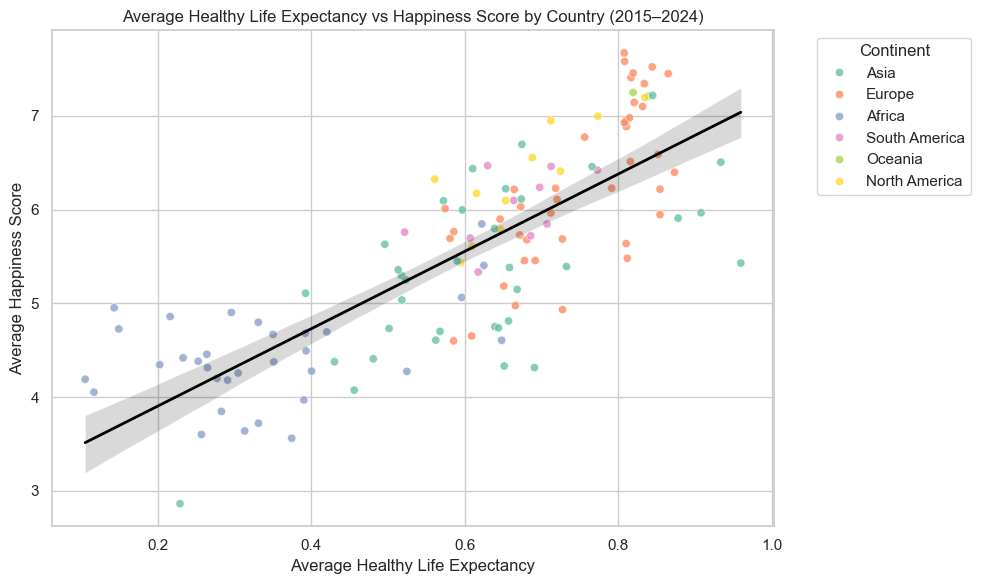

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average values per country
df_avg = df.groupby(['Country', 'Continent'], as_index=False)[
    ['Healthy life expectancy', 'Happiness Score']].mean()

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(data=df_avg, 
                x='Healthy life expectancy', 
                y='Happiness Score', 
                hue='Continent', 
                palette='Set2', 
                alpha=0.8)

sns.regplot(data=df_avg, 
            x='Healthy life expectancy', 
            y='Happiness Score', 
            scatter=False, 
            color='black', 
            line_kws={"linewidth": 2})

plt.title('Average Healthy Life Expectancy vs Happiness Score by Country (2015–2024)')
plt.xlabel('Average Healthy Life Expectancy')
plt.ylabel('Average Happiness Score')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### key findings:
There is a strong positive correlation between healthy life expectancy and happiness scores across countries (2015–2024), showing that better health outcomes are linked to higher well-being. European countries generally exhibit both high life expectancy and happiness, whereas many African nations fall into the lower ranges, highlighting global disparities. This clear relationship suggests that improving health infrastructure and life expectancy could be an effective strategy to boost national happiness and quality of life.


### Chart 2.Happiness Score Trends Over Time (2015–2024)

Goal:This line chart compares annual happiness scores of the top 10 and bottom 10 countries by average happiness, highlighting contrasting trends over the decade. It reveals how happiness levels have evolved differently among the happiest and least happy nations.


<Figure size 1200x600 with 0 Axes>

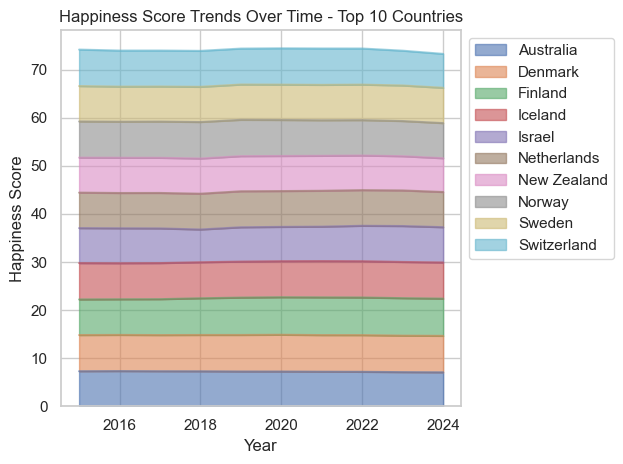

<Figure size 1200x600 with 0 Axes>

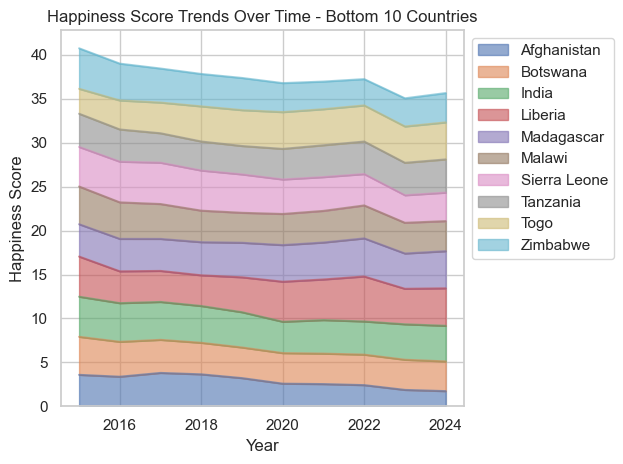

In [3]:
# Get top 10 and bottom 10 countries by average happiness
avg_happiness = df.groupby('Country')['Happiness Score'].mean()
top_10 = avg_happiness.nlargest(10).index
bottom_10 = avg_happiness.nsmallest(10).index

# Filter data
df_top = df[df['Country'].isin(top_10)]
df_bottom = df[df['Country'].isin(bottom_10)]

# Pivot data for plotting
top_pivot = df_top.pivot(index='Year', columns='Country', values='Happiness Score')
bottom_pivot = df_bottom.pivot(index='Year', columns='Country', values='Happiness Score')

# Plot top 10 area chart
plt.figure(figsize=(12, 6))
top_pivot.plot.area(alpha=0.6)
plt.title('Happiness Score Trends Over Time - Top 10 Countries')
plt.ylabel('Happiness Score')
plt.xlabel('Year')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

# Plot bottom 10 area chart
plt.figure(figsize=(12, 6))
bottom_pivot.plot.area(alpha=0.6)
plt.title('Happiness Score Trends Over Time - Bottom 10 Countries')
plt.ylabel('Happiness Score')
plt.xlabel('Year')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [5]:
# Get top 10 happiest countries
top_10_countries = avg_happiness.nlargest(10)
print("Top 10 Happiest Countries:")
print(top_10_countries)

# Get bottom 10 countries with lowest happiness
bottom_10_countries = avg_happiness.nsmallest(10)
print("\nBottom 10 Countries (Lowest Happiness):")
print(bottom_10_countries)

Top 10 Happiest Countries:
Country
Finland        7.6707
Denmark        7.5805
Iceland        7.5221
Norway         7.4569
Switzerland    7.4500
Netherlands    7.4074
Sweden         7.3432
New Zealand    7.2494
Israel         7.2176
Australia      7.2098
Name: Happiness Score, dtype: float64

Bottom 10 Countries (Lowest Happiness):
Country
Afghanistan     2.8641
Tanzania        3.5610
Zimbabwe        3.6018
Botswana        3.6386
Malawi          3.7221
Togo            3.8481
Madagascar      3.9691
Sierra Leone    4.0532
India           4.0745
Liberia         4.1814
Name: Happiness Score, dtype: float64


#### Top 10 Countries – Key Findings
- Nordic countries (e.g., *Finland, Denmark, Norway, Sweden*) consistently maintain the highest happiness scores across the decade.  
- These nations show stable and resilient well-being, with only minor fluctuations year-over-year.  
- Their sustained high scores reflect strong public services, trust, and quality of life, even during global challenges like COVID-19.

#### Bottom 10 Countries – Key Findings
- Countries such as Afghanistan and several Sub-Saharan African nations consistently rank among the lowest in happiness.  
- India remains outside the top rankings, showing fluctuating trends but generally placing in the lower middle tier, reflecting complex development and social challenges.  
- Overall, the lowest-ranked countries show limited progress, highlighting persistent inequalities in well-being and governance.


### Chart #3: Key Happiness Factors Correlation Matrix  
Goal: Visualize the correlations between Happiness Score and key factors such as Economy, Family, Healthy Life Expectancy, Freedom, Perceptions of Corruption, and Generosity using an interactive heatmap built with Plotly.


In [6]:
import plotly.express as px

In [15]:
# Column names
cols = [
    'Happiness Score',
    'Economy',
    'Family',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Perceptions of corruption',
    'Generosity'
]

# Aggregate data by country: take the mean of each factor across the 10 datasets per country
df_agg = df.groupby('Country')[cols].mean().reset_index()

# Compute the correlation matrix on the aggregated data 
corr_matrix = df_agg[cols].corr()

# Create an interactive heatmap using Plotly Express
fig = px.imshow(
    corr_matrix,
    text_auto=True,                        # Display correlation coefficients on the heatmap
    aspect="auto",                         # Automatic aspect ratio
    color_continuous_scale='RdBu_r',      # Diverging color scale for positive/negative correlation
    title='Correlation Matrix of Key Happiness Factors (Averaged by Country)'
)

# Show the plot
fig.show()


### Key Findings: Happiness Factors Correlation Matrix (Averaged by Country)
Family and social connections show the strongest positive correlation with happiness (0.82), followed closely by economy (GDP per capita) at 0.81 and healthy life expectancy at 0.79.

Perceptions of corruption have a moderate negative correlation (0.53), highlighting the impact of governance and trust on well-being.

Generosity shows a weak positive correlation (0.16), indicating a smaller role in influencing happiness.

These results emphasize that family/social connections, economic prosperity, and health outcomes are the primary drivers of national happiness when data is averaged by country.



### Chart 4: Average Scores of Happiness Factors by Continent (2015–2024)

**Goal:**  
Compare average Happiness Scores and the various factors across continents to highlight regional disparities.

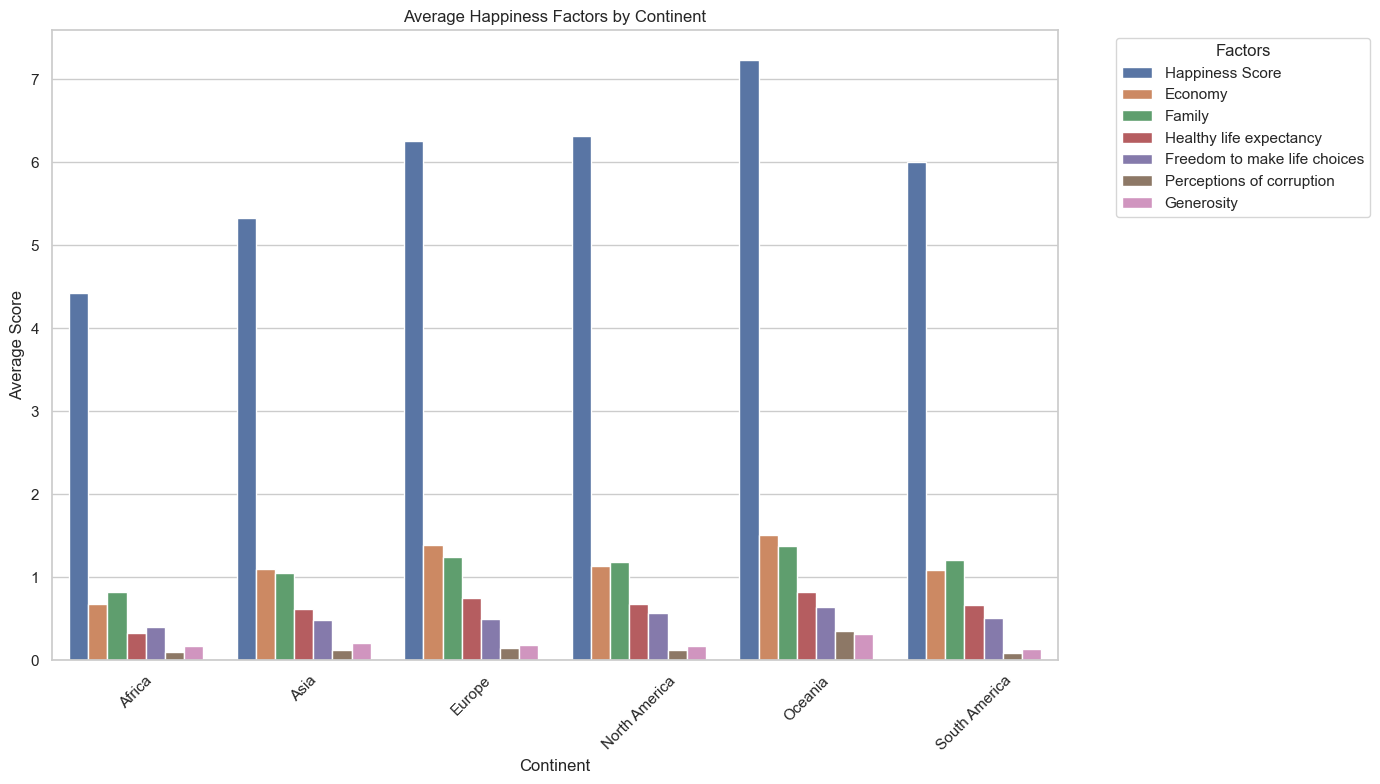

In [ ]:
factors = [
    'Happiness Score', 
    'Economy', 
    'Family', 
    'Healthy life expectancy', 
    'Freedom to make life choices', 
    'Perceptions of corruption', 
    'Generosity'
]

# Aggregate mean by continent for all factors
df_continent = df.groupby('Continent')[factors].mean().reset_index()

# Melt the data for seaborn grouped barplot
df_melted = df_continent.melt(id_vars='Continent', 
                              value_vars=factors, 
                              var_name='Factor', 
                              value_name='Average Value')

# Plot grouped barplot
plt.figure(figsize=(14,8))
sns.barplot(data=df_melted, x='Continent', y='Average Value', hue='Factor')

# Step 4: Customize plot
plt.title('Average Happiness Factors by Continent')
plt.ylabel('Average Score')
plt.xlabel('Continent')
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left')  # legend outside plot
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


#### Key Findings:
Oceania has the highest overall happiness scores at around 7.2, followed by North America and Europe at around 6.2-6.3, while Africa shows the lowest at 4.4. The biggest differences between continents appear in economic factors and healthy life expectancy rather than social support or generosity. Developed regions (Oceania, North America, Europe) consistently outperform developing regions across most happiness factors, suggesting material conditions like GDP and health are key drivers of continental happiness gaps.

#### Next Steps
This descriptive analysis will provide the foundation for:
- **Diagnostic Analysis**: Investigating why certain patterns exist  
- **Predictive Analysis**: Forecasting future happiness trends  
- **Prescriptive Analysis**: Recommending policy interventions  
- **Machine Learning Models**: Building predictive algorithms  

---